In [190]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [191]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys, os

sys.path.append(os.path.abspath(os.path.join('..')))

import diffuconpy as dc

# One Dimensional Convection Model

In [192]:
# Numbers of space and time steps
Nt = 250
Nx = 1500

# Space and time step size
dt = 1/Nt
dx = (5-(-5))/Nx

# Convection Coefficient
convection = 0.75

# Setting up the initial condition
x = np.arange(-5, 5, dx)

#init = 2*(1/np.sqrt(0.01*2*np.pi))*np.exp(-(1/2)*((x**2)/2))
init = 3*np.sin(((2*np.pi)/5)*x)

## Solving the PDE and Calculating it CLF value

In [193]:
# Solving the diffusion equation
def solve(Nt, Nx, dt, dx, convection, init):
    transport = dc.convection_1dims(Nt, Nx, dt, dx, convection, init)
    model = transport.solve()

    return model.solution


In [194]:
density = solve(Nt, Nx, dt, dx, convection, init)

CLF = np.abs(convection*(dt/dx))

print(CLF)

0.44999999999999996


## Plotting the last time step

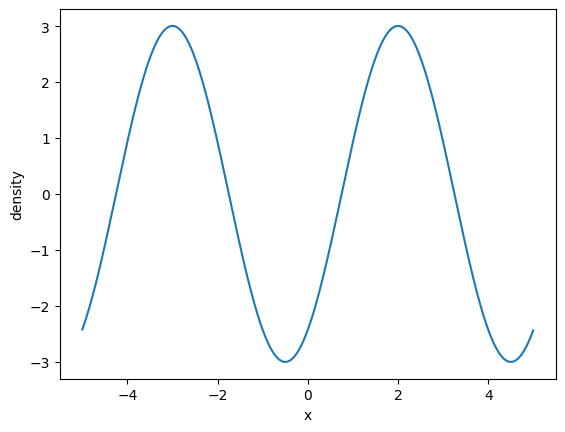

In [195]:
# Plotting the Nt-1 th time step state
plt.figure(0)
plt.plot(x, density[Nt-1])
plt.xlabel('x')
plt.ylabel('density')
plt.show()


## Animating the Solution

In [196]:
# Animates the convection model in 1 dimension
def animation_(solution, X, fps, frn, filename):
        fig = plt.figure()
        ax = plt.axes(xlim=(-5, 5), ylim=(-4, 4)) # left bound -5 and right bound 5
        line, = ax.plot(X, solution[0])
        plt.xlabel('x')
        plt.ylabel('density')

        # animation function.  This is called sequentially
        def animate(i):
            y = solution[i, :]
            global X
            line.set_ydata(y)
            return line,

        # call the animator.  blit=True means only re-draw the parts that have changed.
        anim = animation.FuncAnimation(fig, animate, frames=frn, interval=20, blit=True)
        plt.show()
        anim.save(filename, writer='pillow', fps=fps)


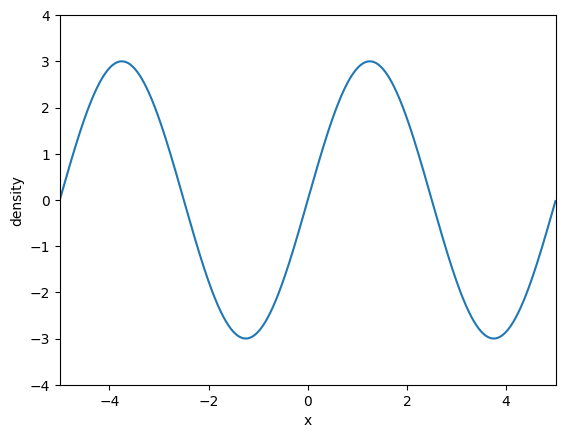

In [197]:
# Setting up the animation
FPS = 60
FRN = 250
FILE = './example-img/convection_in_1_dimension.gif'

# Calling the animation_() function defined in the previous cell.
# See the animation at ./example-img/convection_in_1_dimension.gif
animation_(density, x, FPS, FRN, FILE)